# Supervised CARE Training

Here we use CARE training using noisy images as input and averaged noisy images as target.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
from unet.model import UNet
from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from  https://owncloud.mpi-cbg.de/index.php/s/lt3yecHQMKJnJlB/download. Here we show the pipeline for Mouse actin dataset. Save the dataset at an appropriate location. For us, the path is data folder which exists at `../../../`. For Mouse actin, the data to be denoised is named ```sample_attempt2.tif```. 

In [3]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data'):
    os.mkdir('../../../data')

if not os.path.isdir('../../../data/Mouse actin/'):
    os.mkdir('../../../data/Mouse actin/')

zipPath="../../../data/Mouse actin/Mouse_actin.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://owncloud.mpi-cbg.de/index.php/s/lt3yecHQMKJnJlB/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse actin/")


### Load Data
####  Ensure ```filename = sample_attempt2.tif``` and specify the ```dataName```  

In [4]:
path='../../../data/Mouse actin/'
fileName='sample_attempt2.tif'
dataName='mouseactin' # This will be used to name the care model

#### Noisy Data (Input to network)

In [5]:
data=imread(path+fileName)
nameModel=dataName+'_care'

#### Ground truth Data (Target of Network)

In [6]:
dataGT = np.mean(data, axis=0)[np.newaxis,...,np.newaxis]

In [7]:
data=data[...,np.newaxis]
dataGT = np.repeat(dataGT, 100, axis=0)
print("Shape of Raw Noisy Image is ", data.shape, "; Shape of Target Image is ", dataGT.shape)
data = np.concatenate((data,dataGT),axis=-1)
# Add the target image as a second channel to `data`
print("Shape of `data` is ", data.shape)

Shape of Raw Noisy Image is  (100, 1024, 1024, 1) ; Shape of Target Image is  (100, 1024, 1024, 1)
Shape of `data` is  (100, 1024, 1024, 2)


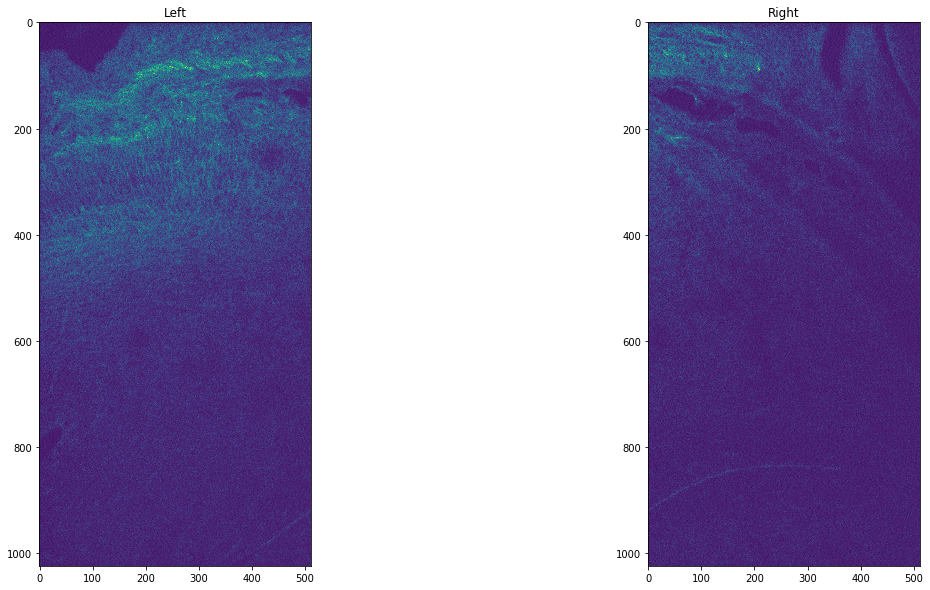

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(data[0,:,:512,0])
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(data[0,:,512:,0])
plt.title('Right')

plt.show()

# We now crop away the left portion of the data since this portion will be used later for testing
data = data[:, :, 512:, :]

### Create the Network and Train it
This can take a while. Ensure that `supervised` = `True`.

In [9]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix=nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3, supervised=True)

Epoch 0 finished      
avg. loss: 0.27627824191004036+-(2SEM)0.38142816367735555      
Epoch 1 finished      
avg. loss: 0.6325290095061064+-(2SEM)0.5136502967243948      
Epoch 2 finished      
avg. loss: 0.14230123106390238+-(2SEM)0.13332173747187703      
Epoch 3 finished      
avg. loss: 0.037429585866630075+-(2SEM)0.007115482906500654      
Epoch 4 finished      
avg. loss: 0.05088666919618845+-(2SEM)0.02809297360948475      
Epoch 5 finished      
avg. loss: 0.0486982312053442+-(2SEM)0.024272915131329998      
Epoch 6 finished      
avg. loss: 0.03644995247013867+-(2SEM)0.014614876660400681      
Epoch 7 finished      
avg. loss: 0.04177999831736088+-(2SEM)0.030525321710804357      
Epoch 8 finished      
avg. loss: 0.03977213641628623+-(2SEM)0.038276624647979395      
Epoch 9 finished      
avg. loss: 0.048573714401572946+-(2SEM)0.03647650832404809      
Epoch 10 finished      
avg. loss: 0.06107532624155283+-(2SEM)0.03581401532615589      
Epoch 11 finished      
avg. loss: 0.0

Epoch 89 finished      
avg. loss: 0.024043252388946713+-(2SEM)0.015020585280235468      
Epoch 90 finished      
avg. loss: 0.025814634328708053+-(2SEM)0.010498084667136415      
Epoch 91 finished      
avg. loss: 0.0339393243426457+-(2SEM)0.0205933726803384      
Epoch    91: reducing learning rate of group 0 to 1.5625e-05.
Epoch 92 finished      
avg. loss: 0.04141602632589638+-(2SEM)0.02321204671833773      
Epoch 93 finished      
avg. loss: 0.024354495154693723+-(2SEM)0.013254255813593964      
Epoch 94 finished      
avg. loss: 0.0262082464993+-(2SEM)0.010065320569347936      
Epoch 95 finished      
avg. loss: 0.022563075320795177+-(2SEM)0.0074733008922614735      
Epoch 96 finished      
avg. loss: 0.033568336605094375+-(2SEM)0.018764337407733457      
Epoch 97 finished      
avg. loss: 0.039239433221518995+-(2SEM)0.0210191716440868      
Epoch 98 finished      
avg. loss: 0.025773584842681885+-(2SEM)0.009004107363427776      
Epoch 99 finished      
avg. loss: 0.0322480086004

Epoch 175 finished      
avg. loss: 0.028402981371618806+-(2SEM)0.014028014856507447      
Epoch 176 finished      
avg. loss: 0.02719020741060376+-(2SEM)0.016841519034433684      
Epoch 177 finished      
avg. loss: 0.0381888150703162+-(2SEM)0.02669079387804968      
Epoch 178 finished      
avg. loss: 0.03494521614629775+-(2SEM)0.018339570643769572      
Epoch 179 finished      
avg. loss: 0.022574755479581654+-(2SEM)0.01273157560921764      
Epoch   179: reducing learning rate of group 0 to 6.1035e-08.
Epoch 180 finished      
avg. loss: 0.03604655137751252+-(2SEM)0.017634359110921007      
Epoch 181 finished      
avg. loss: 0.03087160484865308+-(2SEM)0.01753207789411603      
Epoch 182 finished      
avg. loss: 0.017438432667404413+-(2SEM)0.005235642911985351      
Epoch 183 finished      
avg. loss: 0.018591405102051796+-(2SEM)0.010784474462828998      
Epoch 184 finished      
avg. loss: 0.021217352407984436+-(2SEM)0.009830232130819044      
Epoch 185 finished      
avg. loss: 0

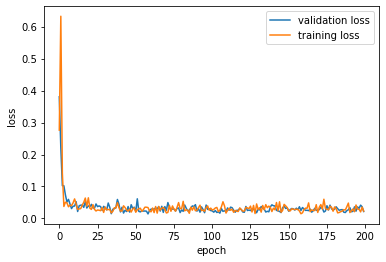

In [11]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()